In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install xarray

In [122]:
## load Moab, Utah temperature data
# load excel data as pandas dataframe
df=pd.read_excel(r'C:\Users\Lenovo\Documents\QuantitativeTechniques\MOAB_1893_2020_MeanMonthlyTemp.xlsx')
data=df.to_numpy()
TMP_MOAB_JUL = data[:,7]
TMP_MOAB_JUL
#years = data[0:,0]

# first replace the missing data ("None") with np.nan
missing_index= (TMP_MOAB_JUL == -999) # first identify the missing data
TMP_MOAB_JUL[missing_index] = np.nan
TMP_MOAB_JUL_degC=(TMP_MOAB_JUL-32)*(5/9)
TMP_MOAB_JUL_degC

#TMP_MOAB_year=np.nanmean(TMP_MOAB_month,1)
# unit conversion deg F ->deg C
#TMP_MOAB_year_degC=(TMP_MOAB_year-32)*(5/9)
#year=df.Year.to_numpy()
#TMP_MOAB_year_degC

array([25.66666667, 26.88888889, 25.        , 26.        , 23.27777778,
       25.38888889, 26.72222222, 25.66666667, 26.44444444, 23.33333333,
       24.33333333, 25.22222222, 24.44444444, 24.66666667, 24.66666667,
       26.        , 26.5       , 26.27777778, 25.11111111, 25.05555556,
       25.27777778, 26.05555556, 24.94444444, 25.27777778, 26.55555556,
       24.61111111, 27.44444444, 25.11111111, 25.33333333, 25.16666667,
       26.83333333, 26.33333333, 27.27777778, 26.16666667, 26.        ,
       25.72222222, 27.5       , 25.83333333,         nan, 25.38888889,
       26.83333333, 26.83333333,         nan, 27.38888889, 26.5       ,
       25.83333333, 27.72222222, 27.05555556, 25.33333333, 26.38888889,
       26.5       , 26.66666667, 27.38888889, 27.66666667, 26.83333333,
       26.38888889, 26.94444444, 25.33333333, 29.16666667, 27.5       ,
       29.33333333, 29.33333333, 26.66666667, 27.38888889, 27.16666667,
       27.44444444, 27.77777778, 28.22222222, 27.66666667, 26.22

In [123]:
# Download the most recent NCEP renalysis monthly data from the link below:
# https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html
# read NCEP reanalysis monthly data (in netcdf format)
# if you get an error in this step, most likely the netcdf4 package is missing in your environment
# to install netcdf4 package, type "conda install netcdf4" in command line
ds=xr.open_dataset('./air.mon.mean.nc')
# show a summary of the dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 883)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [124]:
# extract surface air temperature data for 1893 to 2020
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2020-12-31"))

In [125]:
# Moab, Utah lat lon
# 38.5733° N, 109.5498° W
# note that the longitude range in NCEP data is 0 - 360 deg

# select data for the grid cell Moab located
TMP_MOAB_NCEP=TMP_NCEP.sel(lat=38.5733,lon=360-109.5498,method="nearest")

# calculate annual mean temperature for Moab
TMP_MOAB_NCEP_year=TMP_MOAB_NCEP.groupby('time.year').mean('time')

# calculate climatological mean temperature for MOAB
TMP_MOAB_NCEP_month=TMP_MOAB_NCEP.groupby('time.month').mean('time')

# July temperature for Moab
mon=7;
TMP_MOAB_NCEP_JUL=TMP_MOAB_NCEP.sel(time=TMP_MOAB_NCEP['time.month']==mon)
TMP_MOAB_NCEP_JUL

<xarray.DataArray 'air' (time: 73)>
array([23.393873, 23.24226 , 22.874838, 24.613546, 23.792582, 24.618387,
       24.39097 , 22.711287, 23.163546, 22.122585, 22.284193, 23.674839,
       23.47968 , 23.493225, 22.219995, 23.668388, 23.865805, 22.785479,
       23.811937, 23.254196, 22.583225, 23.304192, 22.918068, 23.288065,
       23.024197, 22.43645 , 22.07419 , 22.743546, 23.416447, 22.380001,
       23.12548 , 23.165483, 24.415161, 23.844515, 21.497097, 22.13032 ,
       20.726778, 22.845478, 20.48097 , 21.167099, 23.807095, 23.242579,
       22.329676, 22.419353, 21.359999, 21.00387 , 22.97871 , 22.665478,
       23.900326, 22.35193 , 23.256128, 21.997744, 23.11774 , 22.466776,
       24.771292, 25.304514, 22.747099, 24.52645 , 24.31097 , 24.667099,
       23.6971  , 23.854836, 23.453228, 22.587414, 22.723873, 23.414839,
       23.80839 , 21.222576, 23.424995, 23.486284, 24.188705, 22.860481,
       23.324993], dtype=float32)
Coordinates:
    lat      float32 37.5
    lon      float32 250.0
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2020-07-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

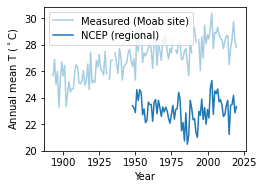

In [126]:
## make a figure that fits into a single column
fig=plt.figure(figsize=(3.5, 2.5)) # define figure size, unit: inches
ax=fig.add_axes([0.1, 0.15, 0.8, 0.8])
cmap=plt.get_cmap('Paired')
plt.plot(year,TMP_MOAB_JUL_degC,label='Measured (Moab site)',color=cmap(0)) 
plt.plot(TMP_MOAB_NCEP_year.year,TMP_MOAB_NCEP_JUL,label='NCEP (regional)',color=cmap(1))
plt.xlabel('Year')
plt.ylabel('Annual mean T ($^\circ$C)')
## add figure legend
plt.legend()

## save figure as .PDF and .PNG
## put save commands before plt.show()
fn='Fig_MOAB_temp'
plt.savefig('./fig/' +fn+ '.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")
plt.show()

In [127]:
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs

# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install cartopy xarray

In [128]:
ds=xr.open_dataset('./air.mon.mean.nc')

# extract surface air temperature data for 1948 to 2020
TMP_NCEP1=ds.air.sel(time=slice("1950-01-01","1960-12-01"))
TMP_NCEP2=ds.air.sel(time=slice("2010-01-01","2020-12-01"))

# Select JULY data for every year and average
TMP_NCEP_JUL1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==7).mean(dim='time')
TMP_NCEP_JUL2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==7).mean(dim='time')

# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=ds.lon.values
Y=ds.lat.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)

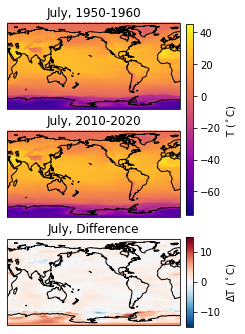

In [129]:
fig=plt.figure(figsize=(8, 5))
ax11 = fig.add_axes([0.42, 0.7,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax11.coastlines()
cf=ax11.pcolormesh(Xb,Yb,TMP_NCEP_JUL1.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax11.set_title('July, 1950-1960')
###
####
ax21 = fig.add_axes([0.42, 0.4,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax21.coastlines()
cf=ax21.pcolormesh(Xb,Yb,TMP_NCEP_JUL2.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax21.set_title('July, 2010-2020')

# add color bar
ax_cb = fig.add_axes([0.73, 0.41,0.0125,0.53])
fig.colorbar(cf, cax=ax_cb, label='T ($^\circ$C)')

#calculate difference
delta_TMP_JUL=TMP_NCEP_JUL2-TMP_NCEP_JUL1

ax12 = fig.add_axes([0.42, 0.1,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax12.coastlines()
cf=ax12.pcolormesh(Xb,Yb,delta_TMP_JUL.values, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
ax12.set_title('July, Difference')

ax_cb2 = fig.add_axes([0.73, 0.1,0.0125,0.25])
fig.colorbar(cf, cax=ax_cb2, label='$\Delta$T ($^\circ$C)')

fn='Fig_Jan_July_temp_diff_rasterized'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)

plt.show()